# NOTES

# IMPORTS

In [1]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np

# Dataset
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from imutils import paths
import imutils
import cv2
import os

# Architecture
from keras.utils import plot_model
from keras import backend as K
from keras import models
from keras import layers

# Compilation
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

# Plotting
import matplotlib.pyplot as plt

# Predictions
from sklearn.metrics import classification_report

Using TensorFlow backend.


## Variables

# DATASET

## Dataset Loader

## Variables

In [2]:
dataset_dir = 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Computer Vision/imagelab/nn/conv/dataAugmentationVGGNET/min_dataset/'
train_cats_dir = os.path.join(dataset_dir, 'train/cats/')
train_dogs_dir = os.path.join(dataset_dir, 'train/dogs/')
test_cats_dir = os.path.join(dataset_dir, 'test/cats/')
test_dogs_dir = os.path.join(dataset_dir, 'test/dogs/')
validation_cats_dir = os.path.join(dataset_dir, 'validation/cats/')
validation_dogs_dir = os.path.join(dataset_dir, 'validation/dogs/')
prediction_dir = os.path.join(dataset_dir, 'predict_on/')

## Preprocessing

In [3]:
class AspectAwarePreprocessor:
    def __init__(self, width, height, inter=cv2.INTER_AREA):
        # store the target image width, height and interpolation method used when resizing
        self.width = width
        self.height = height
        self.inter = inter
    
    def preprocess(self, image):
        # this is a step two algorithm
        # step one determine the shortest dimension and resize along it
        # grab image dimensions and initialize deltas used when cropping image
        (h, w) = image.shape[:2]
        dW = 0
        dH = 0
       
        # resize
        if w < h:
            image = imutils.resize(image, width=self.width, inter=self.inter)
            dH = int((image.shape[0] - self.height) / 2.0)
        else:
            image = imutils.resize(image, height=self.height, inter=self.inter)
            dW = int((image.shape[1] - self.width) / 2.0)
        
        # step two crop the image along the longest dimension to obtain the target width and height
        (h, w) = image.shape[:2]
        image = image[dH:h - dH, dW:w -dW]
        
        # finally, resize the image to the provided spatial dimension to ensure our output image is always a fixed size
        return cv2.resize(image, (self.width, self.height), interpolation=self.inter)

## Load Images

In [4]:
# train path
train_cats_images_path = list(paths.list_images(train_cats_dir))
train_dogs_images_path = list(paths.list_images(train_dogs_dir))

# test path
test_cats_images_path = list(paths.list_images(test_cats_dir))
test_dogs_images_path = list(paths.list_images(test_dogs_dir))

# validation path
validation_cats_images_path = list(paths.list_images(validation_cats_dir))
validation_dogs_images_path = list(paths.list_images(validation_dogs_dir))

# predictions
prediction_images_path = list(paths.list_images(prediction_dir))

In [5]:
def load_imgs(img_paths, verbose=1):
    data = []
    images = []
    inter = cv2.INTER_AREA
    aspect_ratio_preprocessor = AspectAwarePreprocessor(32, 32, inter)
    
    # loop over images path to load images
    for (i, path) in enumerate(img_paths):
        image = cv2.imread(path)
        images.append(image)
        
        if i > 0 and verbose > 0 and (i + 1) % verbose ==0:
            print('[INFO] processed {}/{}'.format((i + 1), len(img_paths)))
        
    # convert images list into a numpy array
    images = np.array(images)
    
    # loop over the images and preprocess each by resizing and converting to an array
    for image in images:
        # resize by considering aspect ratio and convert an image to an array
        image = aspect_ratio_preprocessor.preprocess(image)
        image = img_to_array(image)
        data.append(image)
    
    # convert data to numpy array
    data = np.array(data)
    
    return data
    
    

## Data

### Train

In [6]:
train_cats = load_imgs(train_cats_images_path, verbose=200)
print()
train_cats.shape

[INFO] processed 200/1000
[INFO] processed 400/1000
[INFO] processed 600/1000
[INFO] processed 800/1000
[INFO] processed 1000/1000


C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


(1000, 32, 32, 3)

In [7]:
train_dogs = load_imgs(train_dogs_images_path, verbose=200)
print()
train_dogs.shape

[INFO] processed 200/1000
[INFO] processed 400/1000
[INFO] processed 600/1000
[INFO] processed 800/1000
[INFO] processed 1000/1000


C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


(1000, 32, 32, 3)

### Test

In [8]:
test_cats = load_imgs(test_cats_images_path, verbose=100)
print()
test_cats.shape

[INFO] processed 100/500
[INFO] processed 200/500
[INFO] processed 300/500
[INFO] processed 400/500
[INFO] processed 500/500


C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


(500, 32, 32, 3)

In [9]:
test_dogs = load_imgs(test_dogs_images_path, verbose=100)
print()
test_dogs.shape

[INFO] processed 100/500
[INFO] processed 200/500
[INFO] processed 300/500
[INFO] processed 400/500
[INFO] processed 500/500


C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


(500, 32, 32, 3)

### Validation

In [10]:
validation_cats = load_imgs(validation_cats_images_path, verbose=100)
print()
validation_cats.shape

[INFO] processed 100/500
[INFO] processed 200/500
[INFO] processed 300/500
[INFO] processed 400/500
[INFO] processed 500/500


C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


(500, 32, 32, 3)

In [11]:
validation_dogs = load_imgs(validation_dogs_images_path, verbose=100)
print()
validation_dogs.shape

[INFO] processed 100/500
[INFO] processed 200/500
[INFO] processed 300/500
[INFO] processed 400/500
[INFO] processed 500/500


C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


(500, 32, 32, 3)

## Labels

In [12]:
def extract_labels(img_path):
    labels = []
    
    for path in img_path:
        label = os.path.split(path)[1][:3]
        labels.append(label)
    
    return labels

### Train

In [13]:
train_cats_labels = extract_labels(train_cats_images_path)
train_dogs_labels = extract_labels(train_dogs_images_path)
len(train_cats_labels)

1000

### Test

In [14]:
test_cats_labels = extract_labels(test_cats_images_path)
test_dogs_labels = extract_labels(test_dogs_images_path)
len(test_cats_labels)

500

### Validation

In [15]:
validation_cats_labels = extract_labels(validation_cats_images_path)
validation_dogs_labels = extract_labels(validation_dogs_images_path)
len(validation_cats_labels)

500

## Spliting

### Help Functions

In [16]:
def group_data(list1, list2):
    data = list(list1)
    
    for item in list(list2):
        data.append(item)
    
    data = np.array(data)
    
    return data


def label_binarizer(input_labels):
    lb = LabelBinarizer()
    labels = lb.fit_transform(input_labels)
   
    return labels

### Train

In [17]:
trainX = group_data(train_cats, train_dogs)
trainY = group_data(train_cats_labels, train_dogs_labels)

# shuffling data
(trainX, trainY) = shuffle(trainX, trainY)

# binarization
trainY = label_binarizer(trainY)

# scaling
trainX = trainX.astype('float') / 255.0

### Test

In [18]:
testX = group_data(test_cats, test_dogs)
testY = group_data(test_cats_labels, test_dogs_labels)

# shuffling
(testX, testY) = shuffle(testX, testY)

# binarization
testY = label_binarizer(testY)

# scaling
testX = testX.astype('float') / 255.0

### Validation

In [19]:
validationX = group_data(validation_cats, validation_dogs)
validationY = group_data(validation_cats_labels, validation_dogs_labels)

# shuffling
(validationX, validationY) = shuffle(validationX, validationY)

# binarization
validationY = label_binarizer(validationY)

# scaling
validationX = validationX.astype('float') / 255.0

# ARCHITECTURE DEFINITION

## Variables

In [20]:
width = 32
height = 32
depth = 3
pool_size = (2, 2)
pool_strides = (2, 2)
conv_strides = (3, 3)
filter01 = 32
filter02 = 64
classes = 2
channels_dim = -1
input_shape = (width, height, depth)

# configure input shape
if K.image_data_format() == 'channels_first':
    input_shape = (depth, width, heght)

## Architecture

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(filter01, conv_strides, padding='same', input_shape=input_shape))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization(axis=channels_dim))
model.add(layers.Conv2D(filter01, conv_strides, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization(axis=channels_dim))
model.add(layers.MaxPooling2D(pool_size=pool_size, strides=pool_strides))
model.add(layers.Dropout(0.50))
model.add(layers.Conv2D(filter02, conv_strides, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization(axis=channels_dim))
model.add(layers.Conv2D(filter02, conv_strides, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization(axis=channels_dim))
model.add(layers.MaxPooling2D(pool_size=pool_size, strides=pool_strides))
model.add(layers.Dropout(0.50))
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization(axis=channels_dim))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)       

## Logical Diagram

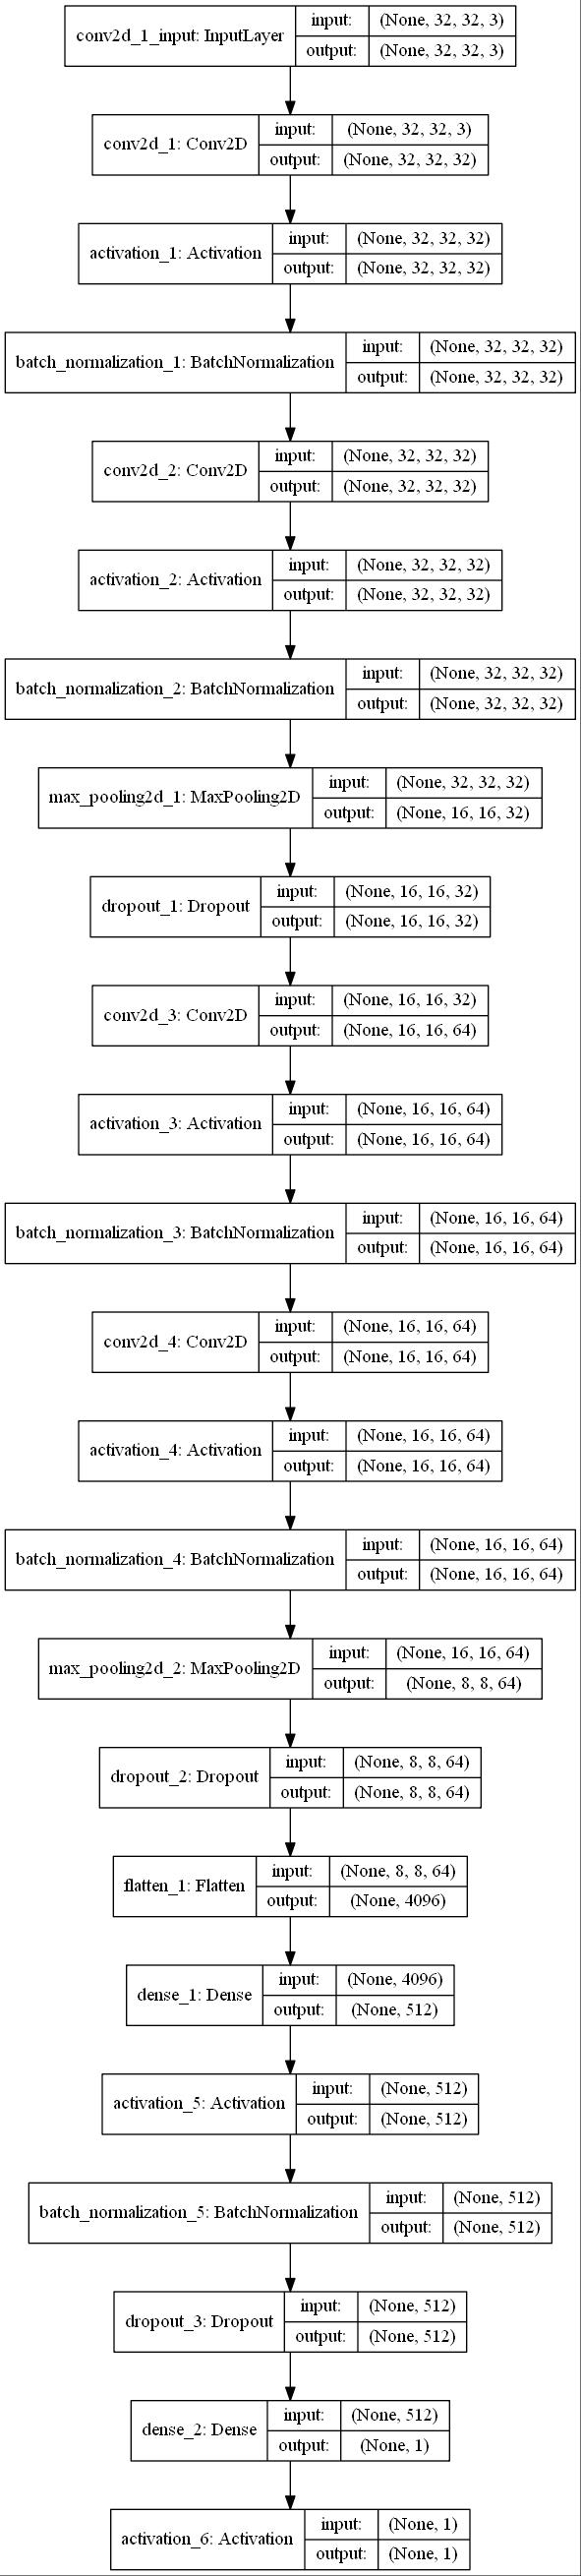

In [23]:
plot_model(model, to_file='serialized/architecture/architecture.jpg', show_shapes=True)

# LR SCHEDULING

## Variables

In [24]:
learning_rate = 0.05

## Normal

In [25]:
opt_normal = SGD(lr=learning_rate)

## Time based 

In [26]:
# time-based lr scheuling
opt_time = SGD(lr =learning_rate, momentum=0.9, nesterov=True, decay= learning_rate / 100)

## Step decay

In [27]:
def step_decay(epoch):
    initialAlpha = learning_rate
    factor = 0.25
    dropEvery = 5
    
    # compute alpha
    alpha = initialAlpha *(factor ** np.floor((1 + epoch) / dropEvery))
    
    return float(alpha)
    

# COMPILATION

In [28]:
model.compile(optimizer=opt_time, loss='binary_crossentropy', metrics=['acc'])

# TRAINING

## Data augmentation

In [29]:
augmented = 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Deep Learning/Computer Vision/imagelab/nn/conv/dataAugmentationVGGNET/augmented/'
prefix = 'image'

# construct the image generator
aug = ImageDataGenerator(rotation_range=30, shear_range=0.2, zoom_range=0.2, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, fill_mode='nearest')

## Callbacks registration

In [30]:
# callbacks = [LearningRateScheduler(step_decay)]

## Train

In [31]:
# history = model.fit(trainX, trainY, epochs=100, callbacks=callbacks, batch_size=32, validation_data=(validationX, validationY))

# Train with data augmentation
history = model.fit_generator(aug.flow(trainX, trainY, batch_size=32), validation_data=(validationX, validationY), epochs=100, steps_per_epoch=len(trainX) // 32, verbose=1)

Epoch 1/100
62/62 [==============================] - 12s 194ms/step - loss: 1.9905 - acc: 0.5396 - val_loss: 9.5643 - val_acc: 0.5440
Epoch 2/100
62/62 [==============================] - 4s 70ms/step - loss: 1.9566 - acc: 0.5386 - val_loss: 7.5342 - val_acc: 0.4960
Epoch 3/100
62/62 [==============================] - 5s 73ms/step - loss: 1.7862 - acc: 0.5346 - val_loss: 2.7022 - val_acc: 0.5370
Epoch 4/100
62/62 [==============================] - 4s 68ms/step - loss: 1.3794 - acc: 0.5534 - val_loss: 2.0983 - val_acc: 0.5220
Epoch 5/100
62/62 [==============================] - 4s 68ms/step - loss: 1.1590 - acc: 0.5467 - val_loss: 0.8123 - val_acc: 0.6020
Epoch 6/100
62/62 [==============================] - 4s 68ms/step - loss: 1.0379 - acc: 0.5518 - val_loss: 0.7994 - val_acc: 0.5450
Epoch 7/100
62/62 [==============================] - 9s 139ms/step - loss: 0.9365 - acc: 0.5625 - val_loss: 0.7125 - val_acc: 0.6140
Epoch 8/100
62/62 [==============================] - 4s 72ms/step - loss:

62/62 [==============================] - 4s 71ms/step - loss: 0.5141 - acc: 0.7459 - val_loss: 0.6526 - val_acc: 0.6700
Epoch 63/100
62/62 [==============================] - 4s 70ms/step - loss: 0.5162 - acc: 0.7439 - val_loss: 0.5731 - val_acc: 0.7070
Epoch 64/100
62/62 [==============================] - 4s 70ms/step - loss: 0.5054 - acc: 0.7602 - val_loss: 0.5657 - val_acc: 0.7200
Epoch 65/100
62/62 [==============================] - 7s 106ms/step - loss: 0.5260 - acc: 0.7454 - val_loss: 0.6133 - val_acc: 0.6910
Epoch 66/100
62/62 [==============================] - 6s 92ms/step - loss: 0.5126 - acc: 0.7515 - val_loss: 0.6530 - val_acc: 0.6620
Epoch 67/100
62/62 [==============================] - 4s 69ms/step - loss: 0.5035 - acc: 0.7525 - val_loss: 0.5371 - val_acc: 0.7250
Epoch 68/100
62/62 [==============================] - 4s 72ms/step - loss: 0.5120 - acc: 0.7490 - val_loss: 0.5730 - val_acc: 0.7130
Epoch 69/100
62/62 [==============================] - 4s 70ms/step - loss: 0.5033

# PLOTTING

## Variables

In [32]:
history_dict = history.history
epochs = np.arange(1, (len(history_dict['acc']) + 1))

accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

## Accuracy

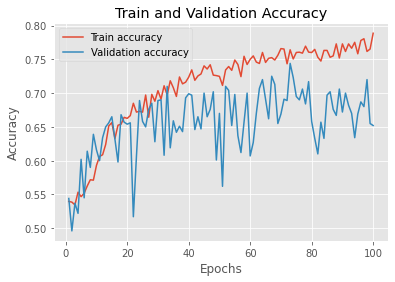

In [33]:
plt.style.use('ggplot')
plt.plot(epochs, accuracy, label='Train accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss

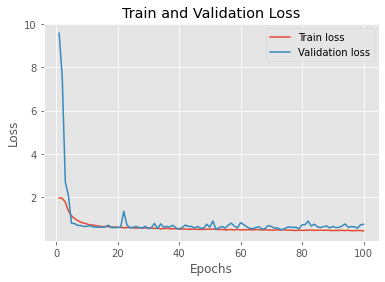

In [34]:
plt.clf()
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# EVALUATION

In [35]:
results = model.evaluate(testX, testY)
results

1000/1000 [==============================] - 1s 588us/step


[0.8223859443664551, 0.6539999842643738]

# PREDICTION

In [36]:
predX = load_imgs(prediction_images_path, verbose=2)

[INFO] processed 2/11
[INFO] processed 4/11
[INFO] processed 6/11
[INFO] processed 8/11
[INFO] processed 10/11


C:\Users\Tajr\Anaconda3\envs\Deep_Learning\lib\site-packages\ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


In [37]:
predX = predX.astype('float') / 255.0

In [38]:
preds = []
predictions = model.predict(predX)

for item in predictions:
    if item > 0.5:
        item = 1
    else:
        item = 0
    preds.append(item)
predictions

array([[0.20627062],
       [0.7635677 ],
       [0.97377783],
       [0.48224968],
       [0.9848162 ],
       [0.70992076],
       [0.65994567],
       [0.955317  ],
       [0.06887835],
       [0.9149248 ],
       [0.44798142]], dtype=float32)

In [39]:
preds

[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0]

In [40]:
classLabels= ['cat', 'dog']
for (i, image_path) in enumerate(prediction_images_path):
    image = cv2.imread(image_path)
    
    cv2.putText(image, 'Label: {}'.format(classLabels[preds[i]]), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.imshow('Image', image)
    cv2.waitKey(0)

# DIFFERENCES